## Confidence Interval 

Okay. Confidence Interval quite didn't make sense to me at first. Becuase no one explains it in depth. All the online sources just tell you what to do and that's it. They don't help you to actually understand what is going on. So here, I will try to explain how I understoond and it is probably right. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

Here I am generating the hypothetical population. Additionally, I have created the sampling distribution of the sample mean. 

In [46]:
np.random.seed(0)
pop_mean = 0
pop_var = 4
pop_std = np.sqrt(pop_var)
sample_size = 100

pop = np.random.normal(pop_mean,pop_std, size=10000)

mean_list = []
for i in range(10000):
    inx = np.random.randint(0,10000, size=sample_size)
    x_bar = np.mean(pop[inx])
    mean_list.append(x_bar)

This is the sampling distribution of the mean. 

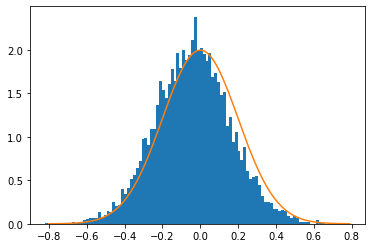

In [47]:
## Standard Error = SE 
SE = np.sqrt(pop_var/sample_size)

x = np.arange(-0.8, 0.8, 0.01)
plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.show()

I am converting all the X mean values into Z values and plotted the histogram. 

In [48]:
z_value_list = np.subtract(mean_list,pop_mean)/SE

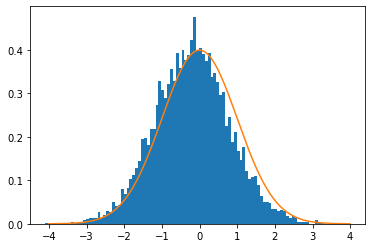

In [49]:
x = np.arange(-4, 4, 0.01)
plt.hist(z_value_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1))
plt.show()

In [52]:
print(1.96*SE)
print(-1.96*SE)

0.392
-0.392


1. $Z = \frac{(X-\mu)}{\sigma}$

2. $Z = \frac{\bar{X}-\mu_{\bar{x}}}{SE}$

If we want to set 2.5% on each tail, that means the z-value is +1.96 and -1.96 on each tail. And say I want to know what value it takes on the sampling distribution of x mean for z values equal to +1.96 and -1.96. Well, it's simple. In our case, we are dealing with x means, so we would take the formula number 2 above and solve for $\bar{x}$

So when we solve for $\bar{x}$, we get 0.392 and -0.392 which corresponds to our z values of 1.96 and -1.96.

### Confidence Interval 

Up to now, it was to make you familiar with sampling distribution, SE, Z values and etc. I didn't want to start off with the confidence interval right away. Otherwise, it would confuse you. Our prime interest is to understand why the hack we use $\bar{X}$ to get confidence interval. But before we do that, I would like to make a 95% confidence interval, setting the mean equal to the true population mean value. I know it is meaningless, but it will help you understand later on. 

Here is the formula for confidence interval setting the mean equal to the true population mean. 

We are going to use the formula number 2. 

$+1.96 = \frac{(\bar{X}-\mu_{\bar{x}})}{SE}$

$-1.96 = \frac{(\bar{X}-\mu_{\bar{x}})}{SE}$

95% confidence interval: 

[$\mu_{\bar{x}} - 1.96 SE$, $\mu_{\bar{x}} + 1.96 SE$]

What it means is that 

$\bar{X} = \mu_{\bar{x}} - 1.96 SE$

$\bar{X} = \mu_{\bar{x}} + 1.96 SE$


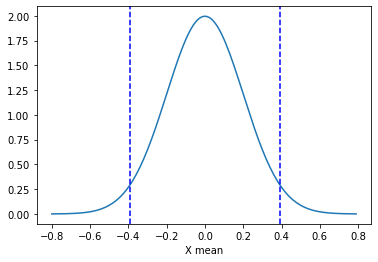

In [117]:
interval_1 = pop_mean - (1.96*SE)
interval_2 = pop_mean + (1.96*SE)

x = np.arange(-0.8, 0.8, 0.01)
#plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.axvline(interval_1, color="blue", linestyle="--")
plt.axvline(interval_2, color="blue", linestyle="--")
plt.xlabel("X mean")

plt.show()

Okay, we just created this 95% confidence interval setting the mean equal to the population mean value. But you know this is meaningless. We already knew the population mean value as well as the population variance value. With the population variance, we calculated the SE value. 

#### Now, let's take one sample from the population

In [92]:
?statistics.variance

In [93]:
?statistics.mean

In [95]:
?statistics.stdev

In [97]:
np.random.seed(0)
inx = np.random.randint(0,10000, size=sample_size)
sample = pop[inx]

sample_mean = np.mean(sample)
sample_var = statistics.variance(sample)
sample_std = statistics.stdev(sample)
SE_hat = np.sqrt(sample_var/sample_size)

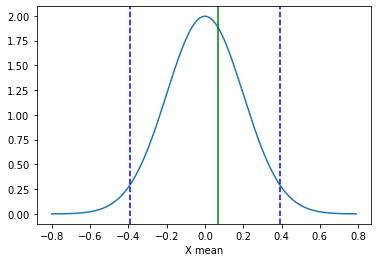

In [116]:
interval_1 = pop_mean - (1.96*SE)
interval_2 = pop_mean + (1.96*SE)

x = np.arange(-0.8, 0.8, 0.01)
#plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.axvline(interval_1, color="blue", linestyle="--")
plt.axvline(interval_2, color="blue", linestyle="--")
plt.xlabel("X mean")

plt.axvline(sample_mean, color="green")

plt.show()

In [90]:
print(sample_mean)

0.06903002092585356


In [100]:
print(SE_hat)

0.19120096172179105


Okay, I have taken one sample with the size of 100. It's mean is 0.069. So I placed a green line to represent this mean of the sample. But what your textbooks or online sources tell you to do is to make a 95% confidence interval around this mean of the sample. In another words, they want you to set the mean equal to this mean of the sample. And we also have to use an estimator for SE as well. The estimator of SE can be calculated from the sample we have drawn. 

$SE = \sqrt\frac{var(x)}{n}$

$\widehat{SE} = \sqrt\frac{S^2_x}{n}$

$+1.96 = \frac{(\bar{X}-\mu_{\bar{x}})}{SE}$

$-1.96 = \frac{(\bar{X}-\mu_{\bar{x}})}{SE}$

$+1.96 = \frac{(\bar{X}-sampleMean)}{\widehat{SE}}$

$-1.96 = \frac{(\bar{X}-sampleMean)}{\widehat{SE}}$

$+1.96 = \frac{(\bar{X}-0.069)}{0.19}$

$-1.96 = \frac{(\bar{X}-0.069)}{0.19}$

Okay, so this is what it is. $\widehat{SE}$ is 0.19. And the actual SE is 0.2 

In [101]:
print(SE)
print(SE_hat)

0.2
0.19120096172179105


And because we want to construct confidence interval around the sample mean we got, we place the sample mean as the mean value in the formula. Let's plot this confidence interval on top of the one we had before. 

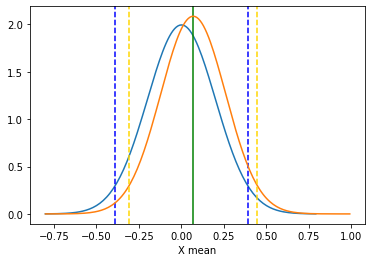

In [121]:
interval_1 = pop_mean - (1.96*SE)
interval_2 = pop_mean + (1.96*SE)

x = np.arange(-0.8, 0.8, 0.01)
#plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.axvline(interval_1, color="blue", linestyle="--")
plt.axvline(interval_2, color="blue", linestyle="--")
plt.xlabel("X mean")

plt.axvline(sample_mean, color="green")

interval_3 = sample_mean - (1.96*SE_hat)
interval_4 = sample_mean + (1.96*SE_hat)

x_1 = np.arange(-0.8, 1, 0.01)
plt.plot(x_1, stats.norm.pdf(x_1, loc=sample_mean, scale=SE_hat))
plt.axvline(interval_3, color="gold", linestyle="--")
plt.axvline(interval_4, color="gold", linestyle="--")

plt.show()

In [133]:
print(interval_3)
print(interval_4)

-0.3057238640488569
0.44378390590056405


And you would conclude that the true population mean will fall between -0.305 and 0.443 with 95% confidence. What the heck does it mean? 

Let's say we take millions of samples from a population that takes the mean of 0.069, which is our sample mean value. Then the sampling distribution would look like the yellow pdf line. Well this pdf line is different from the pdf of sampling distribution with mean equal to the population mean. So as the standard deviation of the pdf. But we used the estimate of SE. So we believe they are quite similar. So only thing that's different is where the pdf is centered. 

And you can eyeball it. The true population mean 0 safely falls under the 95% interval of the yellow pdf. 

And say we took another sample with the mean of 0.25. Well, if draw another sampling distribution that's centered around 0.25, the population mean will still fall under the 95% interval of the pdf. 

But let's say we look a sample whose mean is 0.55. For the sake of the experiment, I am not going to take another random sample. I am just going to set the mean equal to 0.55 and use the SE_hat as before. 

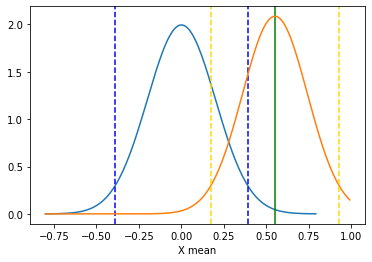

In [139]:
interval_1 = pop_mean - (1.96*SE)
interval_2 = pop_mean + (1.96*SE)

x = np.arange(-0.8, 0.8, 0.01)
#plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.axvline(interval_1, color="blue", linestyle="--")
plt.axvline(interval_2, color="blue", linestyle="--")
plt.xlabel("X mean")

experiment_mean = 0.55

plt.axvline(experiment_mean, color="green")

interval_3 = experiment_mean - (1.96*SE_hat)
interval_4 = experiment_mean + (1.96*SE_hat)

x_1 = np.arange(-0.8, 1, 0.01)
plt.plot(x_1, stats.norm.pdf(x_1, loc=experiment_mean, scale=SE_hat))
plt.axvline(interval_3, color="gold", linestyle="--")
plt.axvline(interval_4, color="gold", linestyle="--")

plt.show()

Great! This is what I intended. If we suppose that the same mean is 0.55, then the population mean, 0 doesn't fall uner the 95% interval of the yellow pdf. That means confidence interval should be used under the premise that the sample mean value has passed the hypothesis testing. 

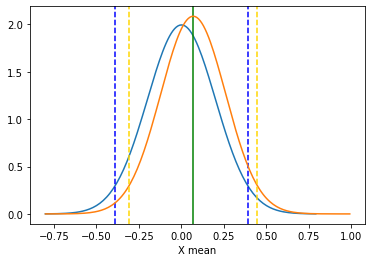

In [140]:
interval_1 = pop_mean - (1.96*SE)
interval_2 = pop_mean + (1.96*SE)

x = np.arange(-0.8, 0.8, 0.01)
#plt.hist(mean_list, bins=100, density=True)
plt.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=SE))
plt.axvline(interval_1, color="blue", linestyle="--")
plt.axvline(interval_2, color="blue", linestyle="--")
plt.xlabel("X mean")

plt.axvline(sample_mean, color="green")

interval_3 = sample_mean - (1.96*SE_hat)
interval_4 = sample_mean + (1.96*SE_hat)

x_1 = np.arange(-0.8, 1, 0.01)
plt.plot(x_1, stats.norm.pdf(x_1, loc=sample_mean, scale=SE_hat))
plt.axvline(interval_3, color="gold", linestyle="--")
plt.axvline(interval_4, color="gold", linestyle="--")

plt.show()

Let's look at the orginial plot again. I want to explain how to treat this confidence interval. The yellow pdf is a hypothetical sampling distribution that is centered around a sample mean that we get from the population. And within the 95% confidence interval, some of the sample means are in the sampling distribution. 

That's why we say we are 95% confident that the true mean value will fall between [from here, to there].

### I don't like this explanation. To begin with, I don't have information about the true mean. All I have is the estimate of the true mean. 